# Titanic 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# read data from train.csv 
rawdata = pd.read_csv("train.csv")
rawtestdata = pd.read_csv("test.csv")


# Data analysis

In [2]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
raw_col_labels = list(rawdata)
raw_col_labels

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

PassengerID: just id of the passenger (no use for the model)  
Survived: the labels we need to predicts (0 for No, 1 for yes)  
Pclass: ticket class (1,2,3)  
Name: First Name, Last Name (maybe no use, or we need to make a new feature to extract the family name)  
Sex: male and female   
Age: can be a float if less than 1, otherwise will be x.0 and x.5  
SibSp: numbers of  siblings / spouses aboard the Titanic  
Parch: numbers of  parents / children aboard the Titanic  
Ticket number: a string (highly no use, maybe can extract the type of ticket)  
Fare: price of ticket  
Cabin: cabin number (can extract the region from A/B/C/...), many NaN  
Embarked: Port of Embarkation	(C = Cherbourg, Q = Queenstown, S = Southampton) 


In [4]:
rawdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Note 1:**
+ Shape: 891(instances),12(features)
+ Null: Age,Cabin,Embarked
+ No use/Labels: PassengerID/Survived  
+ Numerical: Age, SibSp, Parch, Fare
+ Category: Pclass, Name, Sex, Ticket, Cabin, Embarker 
+ Need to extract: Name, Ticket 


Sex
male      0.647587
female    0.352413
Name: count, dtype: float64
Embarked
S    0.722783
C    0.188552
Q    0.086420
Name: count, dtype: float64


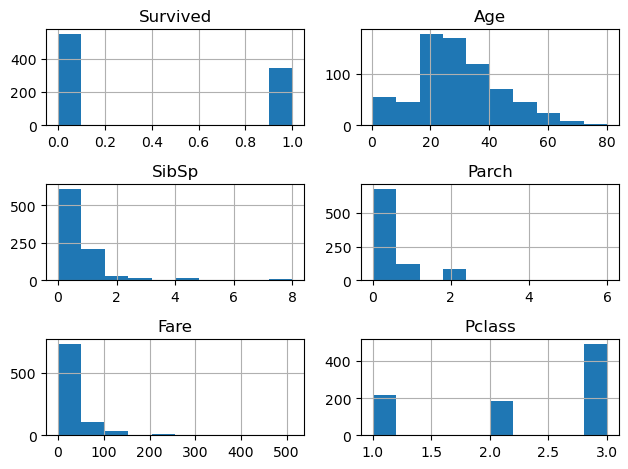

In [5]:
rawdata[["Survived","Age","SibSp","Parch","Fare","Pclass"]].hist()
plt.tight_layout()

print(rawdata["Sex"].value_counts()/len(rawdata["Sex"]))
print(rawdata["Embarked"].value_counts()/len(rawdata["Embarked"]))

For now, lets ignore name, passengerID, ticket and Cabin  
because they are hard string
 

In [6]:
col_names_1 = [
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked','Survived']
data_1 = rawdata[col_names_1]

In [7]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


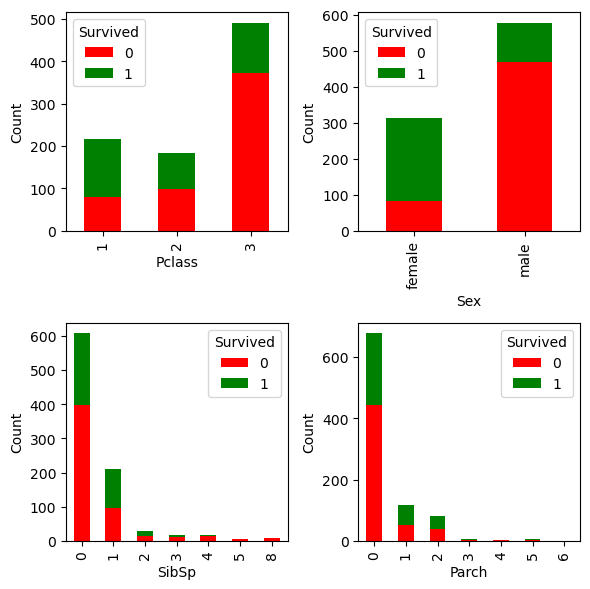

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

# Plot for Pclass
grouped_pclass = rawdata.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)
grouped_pclass.plot(kind='bar', stacked=True, ax=axes[0,0], color=['red', 'green'])
axes[0,0].set_xlabel('Pclass')
axes[0,0].set_ylabel('Count')

# Plot for Sex
grouped_sex = rawdata.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)
grouped_sex.plot(kind='bar', stacked=True, ax=axes[0,1], color=['red', 'green'])
axes[0,1].set_xlabel('Sex')
axes[0,1].set_ylabel('Count')

grouped_sibsp = rawdata.groupby(['SibSp', 'Survived']).size().unstack(fill_value=0)
grouped_sibsp.plot(kind='bar', stacked=True, ax=axes[1, 0], color=['red', 'green'])
axes[1, 0].set_xlabel('SibSp')
axes[1, 0].set_ylabel('Count')

grouped_parch = rawdata.groupby(['Parch', 'Survived']).size().unstack(fill_value=0)
grouped_parch.plot(kind='bar', stacked=True, ax=axes[1, 1], color=['red', 'green'])
axes[1, 1].set_xlabel('Parch')
axes[1, 1].set_ylabel('Count')
# # Adjust layout
plt.tight_layout()

# Show plot
plt.show()

C:\Users\Phan Trong Dai\AppData\Local\Temp\ipykernel_17084\4037344423.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1.loc[:, "Agegroup"]= pd.cut(data_1["Age"],bins=bins,labels=labels,right=True, include_lowest=True)
C:\Users\Phan Trong Dai\AppData\Local\Temp\ipykernel_17084\4037344423.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age= data_1.groupby(['Agegroup', 'Survived']).size().unstack(fill_value=0)


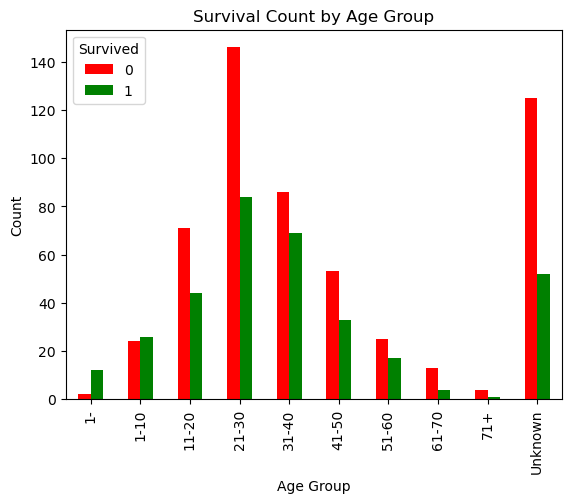

In [9]:
bins = [float('-inf'),1, 10, 20, 30,40,50,60,70, float('inf')]
labels = ['1-', '1-10', '11-20','21-30','31-40','41-50', '51-60','61-70','71+']
data_1.loc[:, "Agegroup"]= pd.cut(data_1["Age"],bins=bins,labels=labels,right=True, include_lowest=True)
data_1.loc[:, "Agegroup"] = data_1["Agegroup"].cat.add_categories("Unknown").fillna('Unknown')
grouped_age= data_1.groupby(['Agegroup', 'Survived']).size().unstack(fill_value=0)
grouped_age.plot(kind='bar', stacked=False, color=['red', 'green'])

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Survival Count by Age Group')
plt.show()


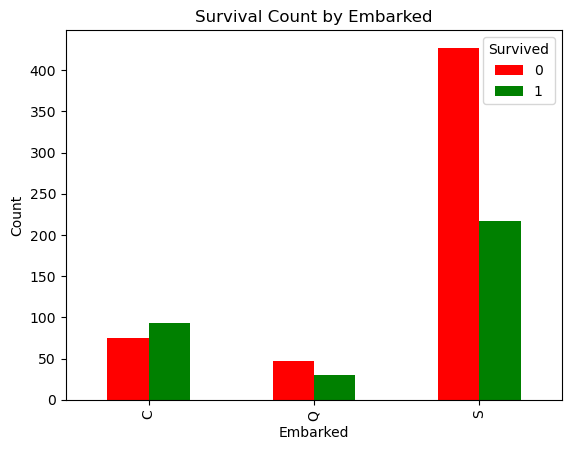

In [10]:
# Adding 'Unknown' category and filling blank cells with 'Unknown'
data_1.loc[:,"Embarked"] = data_1["Embarked"].astype("category")
# Grouping by Embarked and Survived
grouped_embarked = data_1.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
grouped_embarked.plot(kind='bar', stacked=False, color=['red', 'green'])

# Adding labels and title
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survival Count by Embarked')

# Displaying the plot
plt.show()


**Note 2:**
+ higher class, higher survive rate 
+ the rate of survived female is higher 
+ its likely that the more relative, the higher percent you lived
+ the younger, the higher survive rate 
+ it also seem to be less survive rate for unknow age group 
+ embark at C survived the most


In [11]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    891 non-null    int64   
 1   Sex       891 non-null    object  
 2   Age       714 non-null    float64 
 3   SibSp     891 non-null    int64   
 4   Parch     891 non-null    int64   
 5   Fare      891 non-null    float64 
 6   Embarked  889 non-null    object  
 7   Survived  891 non-null    int64   
 8   Agegroup  891 non-null    category
dtypes: category(1), float64(2), int64(4), object(2)
memory usage: 57.1+ KB


# Data Extraction

In [12]:
label_col = ["Survived"]
numerical_cols = ["Pclass","Age","SibSp","Parch","Fare"]
category_cols = ["Sex","Embarked"]

numerical_data = rawdata[numerical_cols]
print(numerical_data.info())

category_data = rawdata[category_cols]
print(category_data.info())

labels = rawdata[label_col]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Age     714 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       891 non-null    object
 1   Embarked  889 non-null    object
dtypes: object(2)
memory usage: 14.1+ KB
None


<h2> Handle category</h2>  

In [13]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder 
ord_encoder = OrdinalEncoder()
onehot_encoder = OneHotEncoder()
category_data = category_data.fillna("S") #because there are only 2 blank cells so I decided to fill it with S
category_data["Sex"]= ord_encoder.fit_transform(category_data[["Sex"]])
embarked_encoded = (onehot_encoder.fit_transform(category_data[["Embarked"]])).toarray()
embarked_encoded_df = pd.DataFrame(embarked_encoded, columns=onehot_encoder.get_feature_names_out(["Embarked"]))

encoded_category_data = pd.concat([category_data["Sex"],embarked_encoded_df],axis=1)
encoded_category_data

,Sex,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0
...,...,...,...,...
886,1.0,0.0,0.0,1.0
887,0.0,0.0,0.0,1.0
888,0.0,0.0,0.0,1.0
889,1.0,1.0,0.0,0.0


<h2> Handle blank cells</h2>  

In [14]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
filled_numerical_data = imputer.fit_transform(numerical_data)
filled_numerical_data = pd.DataFrame(filled_numerical_data, columns=numerical_data.columns)
filled_numerical_data

,Pclass,Age,SibSp,Parch,Fare
0,3.0,22.0,1.0,0.0,7.2500
1,1.0,38.0,1.0,0.0,71.2833
2,3.0,26.0,0.0,0.0,7.9250
3,1.0,35.0,1.0,0.0,53.1000
4,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...
886,2.0,27.0,0.0,0.0,13.0000
887,1.0,19.0,0.0,0.0,30.0000
888,3.0,28.0,1.0,2.0,23.4500
889,1.0,26.0,0.0,0.0,30.0000


In [15]:
full_data = pd.DataFrame(pd.concat([filled_numerical_data,encoded_category_data],axis=1))
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_full_data = std_scaler.fit_transform(full_data)
scaled_full_data = pd.DataFrame(scaled_full_data, columns=full_data.columns)
scaled_full_data

,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.737695,-0.482043,-0.307562,0.615838
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,-1.355574,2.074505,-0.307562,-1.623803
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,-1.355574,-0.482043,-0.307562,0.615838
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,-1.355574,-0.482043,-0.307562,0.615838
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,0.737695,-0.482043,-0.307562,0.615838
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,-1.355574,-0.482043,-0.307562,0.615838
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,-1.355574,-0.482043,-0.307562,0.615838
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,0.737695,2.074505,-0.307562,-1.623803


# Choosing Model

In [16]:
# first, let set the data to X and y, also we will use KFold
from sklearn.model_selection import KFold
X = scaled_full_data
y = labels.values 
y = y.reshape(y.shape[0],)
kf = KFold(n_splits=15, shuffle=True, random_state=42)

# now let try some well-known models

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# Define parameter grid
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],  # Regularization parameter
    'penalty': ['l2'],  # Penalty (L1, L2, ElasticNet)
}

# Initialize SGDClassifier
sgd_cls = SGDClassifier()

# Initialize GridSearchCV with SGDClassifier and parameter grid
grid_search_sgd = GridSearchCV(estimator=sgd_cls, param_grid=param_grid, cv=kf, scoring='accuracy')

# Perform Grid Search
grid_search_sgd.fit(X, y)

# Get the best parameters and best score
best_params_sgd = grid_search_sgd.best_params_
best_score_sgd = grid_search_sgd.best_score_

print("Best parameters for SGD-SVM:", best_params_sgd)
print("Best mean cross-validation score for SGD-SVM:", best_score_sgd)


Best parameters for SGD-SVM: {'alpha': 0.01, 'penalty': 'l2'}
Best mean cross-validation score for SGD-SVM: 0.7880037664783429


In [18]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier 
sgd_cls = SGDClassifier(alpha=0.001)

# Perform cross-validation and get the scores
scores_sgd = cross_val_score(sgd_cls, X, y, cv=kf)

# Print the scores
print("Cross-validation scores for SGD-SVM:", np.mean(scores_sgd))

Cross-validation scores for SGD-SVM: 0.7946704331450096


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression()

param_grid = {
    'penalty': ['l2'], 
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Inverse of regularization strength
}
grid_search_logreg = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search_logreg.fit(X, y)
best_params_logreg = grid_search_logreg.best_params_
best_score_logreg = grid_search_logreg.best_score_
print("Best parameters for Logistic Regression:", best_params_logreg)
print("Best mean cross-validation score for Logistic Regression:", best_score_logreg)

Best parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2'}
Best mean cross-validation score for Logistic Regression: 0.8116007532956685


In [20]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression(C=0.01,penalty='l2')
scores_logreg = cross_val_score(log_reg, X, y, cv=kf)
print("Cross-validation scores for Logistic Regression:", np.mean(scores_logreg))

Cross-validation scores for Logistic Regression: 0.8116007532956685


In [21]:
from sklearn.svm import SVC 
svm_rbf_classifier = SVC(kernel='rbf')
svm_poly_classifier = SVC(kernel='poly')
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}
grid_search_SVC_RBF= GridSearchCV(estimator=svm_rbf_classifier, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search_SVC_Poly= GridSearchCV(estimator=svm_poly_classifier, param_grid=param_grid, cv=kf, scoring='accuracy')
grid_search_SVC_RBF.fit(X, y)
grid_search_SVC_Poly.fit(X, y)
print("Best parameters for SVC with RBF kernel:", grid_search_SVC_RBF.best_params_)
print("Best mean cross-validation score for SVC with RBF kernel:", grid_search_SVC_RBF.best_score_)

print("Best parameters for SVC with polynomial kernel:", grid_search_SVC_Poly.best_params_)
print("Best mean cross-validation score for SVC with polynomial kernel:", grid_search_SVC_Poly.best_score_)

Best parameters for SVC with RBF kernel: {'C': 1, 'gamma': 'scale'}
Best mean cross-validation score for SVC with RBF kernel: 0.8295291902071563
Best parameters for SVC with polynomial kernel: {'C': 1, 'gamma': 'auto'}
Best mean cross-validation score for SVC with polynomial kernel: 0.8160640301318268


In [22]:
svm_rbf_classifier = SVC(kernel='rbf',C=10,gamma='scale')
svm_poly_classifier = SVC(kernel='poly',C=1,gamma='auto')
scores_svc_rbf = cross_val_score(svm_rbf_classifier, X, y, cv=kf)
scores_svc_poly = cross_val_score(svm_poly_classifier, X, y, cv=kf)
print("Cross-validation scores for SVC RBF:", np.mean(scores_svc_rbf))
print("Cross-validation scores for SVC Poly:", np.mean(scores_svc_poly))


Cross-validation scores for SVC RBF: 0.8216760828625236
Cross-validation scores for SVC Poly: 0.8160640301318268


In [23]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV, StratifiedKFold
param_grid = {
    'n_estimators': [10,4,8,16],
    'max_depth': [5,10,15,25,50],
    'bootstrap': [False, True]
}
rfc = RandomForestClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True) # custom cv to get the stratified valid test
grid_search_RF = GridSearchCV(rfc, param_grid=param_grid, cv=cv, scoring='accuracy') 
grid_search_RF.fit(X, y)
best_params_RF = grid_search_RF.best_params_

print("Best parameters for Random Forest:", best_params_RF)
print("Best accuracy score for Random Forest:", grid_search_RF.best_score_)

Best parameters for Random Forest: {'bootstrap': False, 'max_depth': 5, 'n_estimators': 4}
Best accuracy score for Random Forest: 0.8260121775155357


In [24]:
rfc = RandomForestClassifier(max_depth=10,n_estimators=10,bootstrap=False)
scores_rfc = cross_val_score(rfc, X, y, cv=kf)
print("Cross-validation scores for RFC:", np.mean(scores_rfc))


Cross-validation scores for RFC: 0.8216195856873824


In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [8,16,20,25],
    'max_depth': [5,10,15,25,50],
}
cv = StratifiedKFold(n_splits=5, shuffle=True) # custom cv to get the stratified valid test
grid_search_GBC = GridSearchCV(gbc, param_grid=param_grid, cv=cv, scoring='accuracy') 
grid_search_GBC.fit(X, y)

print("Best parameters for Gradient Boosting:", grid_search_GBC.best_params_)
print("Best accuracy score for Gradient Boosting:", grid_search_GBC.best_score_)

Best parameters for Gradient Boosting: {'max_depth': 5, 'n_estimators': 16}
Best accuracy score for Gradient Boosting: 0.8316552633230808


In [26]:
gbc = GradientBoostingClassifier(max_depth=5,n_estimators=16)
scores_gbc = cross_val_score(gbc, X, y, cv=kf)
print("Cross-validation scores for GBC:", np.mean(scores_gbc))


Cross-validation scores for GBC: 0.8339924670433145


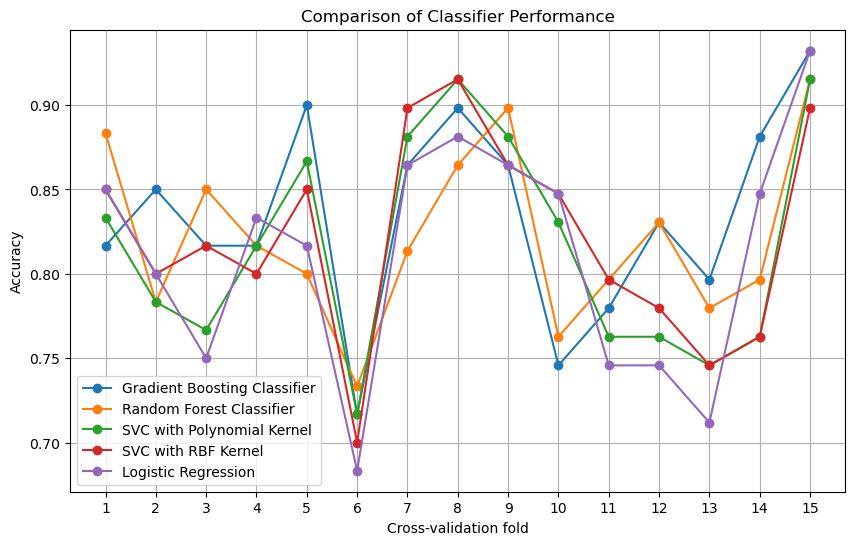

In [27]:
import matplotlib.pyplot as plt

# Scores for each classifier
scores = {
    'Gradient Boosting Classifier': scores_gbc,
    'Random Forest Classifier': scores_rfc,
    'SVC with Polynomial Kernel': scores_svc_poly,
    'SVC with RBF Kernel': scores_svc_rbf,
    'Logistic Regression': scores_logreg
}

# Plotting
plt.figure(figsize=(10, 6))
for classifier, score in scores.items():
    plt.plot(range(1, 16), score, marker='o', label=classifier)

plt.title('Comparison of Classifier Performance')
plt.xlabel('Cross-validation fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, 16))
plt.legend()
plt.grid(True)
plt.show()


**Note 3:**
+ the logistic seem to work worser than others 
+ Overall, other models give us ~81% acc 
+ the Gradient boosting works slightly better ~82.5% 
+ Random forest seem to have the most consistency (only drop below 75% 1 time)

# Finetuning 

<h2>Fine tuning Forest</h2>

In [28]:
feature_names = full_data.columns.tolist()

# Retrieve feature importances and convert to percentages
rf_feature_importances = grid_search_RF.best_estimator_.feature_importances_ * 100
gbc_feature_importances = grid_search_GBC.best_estimator_.feature_importances_ * 100

# Create a DataFrame to store feature importances
compare_feature_df = pd.DataFrame({'Feature': feature_names,
                   'Random Forest': rf_feature_importances,
                   'Gradient Boosting': gbc_feature_importances})

# Display the DataFrame
print(compare_feature_df)

      Feature  Random Forest  Gradient Boosting
0      Pclass      15.524429          15.405544
1         Age       8.872518          13.390535
2       SibSp       4.512950           5.243679
3       Parch       1.189546           1.219372
4        Fare      14.861554          15.362497
5         Sex      52.089212          48.139613
6  Embarked_C       0.228110           0.379266
7  Embarked_Q       0.650849           0.003202
8  Embarked_S       2.070833           0.856292


we can see that the Embarked hardly did anything right here  
also the parch and sibSp is really bad  
so we can drop 3 Embarked cols and add Relative = Parch + SibSp  
then run the model one more time too see if we can get a better result  

In [29]:
important_data = scaled_full_data.drop(columns=["Parch","SibSp","Embarked_C","Embarked_Q","Embarked_S"])
important_data['Relative'] = scaled_full_data["Parch"]+scaled_full_data["SibSp"]
scaled_imp_data = std_scaler.fit_transform(important_data)
important_X = scaled_imp_data
important_y = y 

In [30]:
scores_imp_rfc = cross_val_score(rfc, important_X, important_y, cv=kf)
print("Cross-validation scores for RFC:", np.mean(scores_imp_rfc))
scores_imp_gbc = cross_val_score(gbc, important_X, important_y, cv=kf)
print("Cross-validation scores for GBC:", np.mean(scores_imp_gbc))

Cross-validation scores for RFC: 0.8238229755178909
Cross-validation scores for GBC: 0.8316949152542373


**the accuracy score slightly improved!**

<h2>Fine tuning SVM</h2>

In [36]:
# we will use FSB and FSF to feature selection
from sklearn.feature_selection import f_classif,SelectKBest ,SequentialFeatureSelector

selector_fsf = SelectKBest(f_classif, k=7)
X_fsf = selector_fsf.fit_transform(X, y)

selector_fsb = SequentialFeatureSelector(svm_rbf_classifier, n_features_to_select=7,direction='forward')
X_fsb = selector_fsb.fit_transform(X, y)
chosen_indices_fsf = selector_fsf.get_support(indices=True)
chosen_indices_fsb = selector_fsb.get_support(indices=True)
print("Chosen cols in FSB:",full_data.columns[chosen_indices_fsb].tolist())
print("Chosen cols in FSF:",full_data.columns[chosen_indices_fsf].tolist())

Chosen cols in FSB: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked_Q']
Chosen cols in FSF: ['Pclass', 'Age', 'Parch', 'Fare', 'Sex', 'Embarked_C', 'Embarked_S']


In [37]:
scores_logreg_fsb= cross_val_score(log_reg, X_fsb, y, cv=kf)
print("Cross-validation scores for Logistic Regression FSB:", np.mean(scores_logreg_fsb))
scores_logreg_fsf= cross_val_score(log_reg, X_fsf, y, cv=kf)
print("Cross-validation scores for Logistic Regression FSF:", np.mean(scores_logreg_fsf))

Cross-validation scores for Logistic Regression FSB: 0.8025423728813561
Cross-validation scores for Logistic Regression FSF: 0.7947645951035781


In [38]:
svm_rbf_classifier = SVC(kernel='rbf',C=10,gamma='scale')
svm_poly_classifier = SVC(kernel='poly',C=1,gamma='auto')
scores_svc_corr_rbf_fsf = cross_val_score(svm_rbf_classifier, X_fsf, y, cv=kf)
print("Cross-validation scores for SVC RBF FSF:", np.mean(scores_svc_corr_rbf_fsf))
scores_svc_corr_rbf_fsb = cross_val_score(svm_rbf_classifier, X_fsb, y, cv=kf)
print("Cross-validation scores for SVC RBF FSB:", np.mean(scores_svc_corr_rbf_fsb))
scores_svc_corr_poly_fsf = cross_val_score(svm_poly_classifier, X_fsf, y, cv=kf)
print("Cross-validation scores for SVC Poly FSF:", np.mean(scores_svc_corr_poly_fsf))
scores_svc_corr_poly_fsb = cross_val_score(svm_poly_classifier, X_fsb, y, cv=kf)
print("Cross-validation scores for SVC Poly FSB:", np.mean(scores_svc_corr_poly_fsb))

Cross-validation scores for SVC RBF FSF: 0.804858757062147
Cross-validation scores for SVC RBF FSB: 0.8250470809792845
Cross-validation scores for SVC Poly FSF: 0.8104896421845573
Cross-validation scores for SVC Poly FSB: 0.8161016949152543


FSB gives us a better accuracy score overall  
Chosen cols in FSB: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked_Q']

as we can see, it decided to drop Embarked_C and Embarked_S  
and also, the accuracy slightly improved (about 0.05) 

# Conclusion
 OK, so I dont think i can improve the result anymore (with my current knowledge)

I will try to use both **RBF_SVM** and **Gradient Boosting** for the test.csv!!!

In [39]:
numerical_test = rawtestdata[numerical_cols]
category_test = rawtestdata[category_cols]

category_test.fillna("S")
category_test["Sex"]= ord_encoder.fit_transform(category_test[["Sex"]])
embarked_encoded_test = (onehot_encoder.fit_transform(category_test[["Embarked"]])).toarray()
embarked_encoded_test_df = pd.DataFrame(embarked_encoded_test, columns=onehot_encoder.get_feature_names_out(["Embarked"]))
encoded_category_test = pd.concat([category_test["Sex"],embarked_encoded_test_df],axis=1)



C:\Users\Phan Trong Dai\AppData\Local\Temp\ipykernel_17084\665695479.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_test["Sex"]= ord_encoder.fit_transform(category_test[["Sex"]])


In [40]:
filled_numerical_test = imputer.fit_transform(numerical_test)
filled_numerical_test = pd.DataFrame(filled_numerical_test, columns=numerical_data.columns)


In [41]:
full_test = pd.DataFrame(pd.concat([filled_numerical_test,encoded_category_test],axis=1))
scaled_full_test = std_scaler.fit_transform(full_test)
scaled_full_test = pd.DataFrame(scaled_full_test, columns=full_test.columns)


In [73]:
X_test = scaled_full_test
svm_rbf_classifier = SVC(kernel='rbf',C=10,gamma='scale')
gbc = GradientBoostingClassifier(max_depth=5,n_estimators=16)
important_test = scaled_full_test.drop(columns=["Parch","SibSp","Embarked_C","Embarked_Q","Embarked_S"])
important_test['Relative'] = scaled_full_test["Parch"]+scaled_full_test["SibSp"]
scaled_imp_test = std_scaler.fit_transform(important_test)
important_X_test = scaled_imp_test

gbc.fit(important_X,important_y)
predict_gbc_y = gbc.predict(important_X_test)

In [74]:
ans_gbc_pd = pd.DataFrame(predict_gbc_y,columns=["Survived"])
ans_gbc_pd.value_counts()

Survived
0           289
1           129
Name: count, dtype: int64

In [75]:
final_ans_gbc_pd = pd.concat([rawtestdata['PassengerId'],ans_gbc_pd],axis=1)
final_ans_gbc_pd

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [72]:
final_ans_gbc_pd.to_csv("predict_gbc.csv",index=False)

In [63]:
X_test_2 = scaled_full_test
fsb_test = scaled_full_test.drop(columns=["Embarked_C","Embarked_S"])
scaled_fsb_test = std_scaler.fit_transform(fsb_test)
fsb_X_test = scaled_fsb_test

svm_rbf_classifier.fit(X_fsb,y)
predict_rbf_svm_y = svm_rbf_classifier.predict(fsb_X_test)

In [64]:
ans_rbf_svm_pd = pd.DataFrame(predict_rbf_svm_y,columns=["Survived"])
ans_rbf_svm_pd.value_counts()

Survived
0           285
1           133
Name: count, dtype: int64

In [67]:
final_ans_rbf_svm_pd = pd.concat([rawtestdata['PassengerId'],ans_rbf_svm_pd],axis=1)
final_ans_rbf_svm_pd

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [68]:
final_ans_rbf_svm_pd.to_csv("predict_rbf_svm.csv",index=False)


In [76]:
X_test = scaled_full_test
single_best_model = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           n_jobs=-1,
                                           verbose=1)
scores_single_best_model = cross_val_score(gbc, X, y, cv=kf)
print("Cross-validation scores for single_best_model:", np.mean(scores_single_best_model))

Cross-validation scores for single_best_model: 0.8339924670433145


In [77]:
single_best_model.fit(X,y)
predict_sinle_best_model_y = single_best_model.predict(X_test)

d:\DownloadDiskD\conda\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    4.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks   

In [78]:
ans_single_best_model_pd = pd.DataFrame(predict_sinle_best_model_y,columns=["Survived"])
ans_single_best_model_pd.value_counts()

Survived
0           277
1           141
Name: count, dtype: int64

In [79]:
final_ans_single_best_model_pd = pd.concat([rawtestdata['PassengerId'],ans_single_best_model_pd],axis=1)
final_ans_single_best_model_pd

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [80]:
final_ans_single_best_model_pd.to_csv("predict_single_best_model.csv",index=False)